## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 273us/step - loss: 2.2802 - acc: 0.1352 - val_loss: 2.2510 - val_acc: 0.1638
Epoch 2/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.2318 - acc: 0.1888 - val_loss: 2.2111 - val_acc: 0.2139
Epoch 3/500
50000/50000 [==============================] - 12s 241us/step - loss: 2.1927 - acc: 0.2195 - val_loss: 2.1750 - val_acc: 0.2331
Epoch 4/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.1579 - acc: 0.2347 - val_loss: 2.1411 - val_acc: 0.2400
Epoch 5/500
50000/50000 [==============================] - 11s 228us/step - loss: 2.1243 - acc: 0.2429 - val_loss: 2.1088 - val_acc: 0.2514
Epoch 6/500
50000/50000 [==============================] - 12s 231us/step - loss: 2.0931 - acc: 0.2526 - val_loss: 2.0785 - val_acc: 0.2623
Epoch 7/500
50000/50000 [==============================] - 11s

Epoch 57/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.6980 - acc: 0.4043 - val_loss: 1.7053 - val_acc: 0.4061
Epoch 58/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.6953 - acc: 0.4052 - val_loss: 1.6981 - val_acc: 0.4036
Epoch 59/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.6920 - acc: 0.4064 - val_loss: 1.6958 - val_acc: 0.4058
Epoch 60/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.6889 - acc: 0.4095 - val_loss: 1.6931 - val_acc: 0.4091
Epoch 61/500
50000/50000 [==============================] - 11s 221us/step - loss: 1.6859 - acc: 0.4091 - val_loss: 1.6905 - val_acc: 0.4042
Epoch 62/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.6830 - acc: 0.4101 - val_loss: 1.6878 - val_acc: 0.4080
Epoch 63/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.6801 - acc: 0.4105 - val_loss: 1.6843 - val_acc: 0.4080
Epoch 64/500


50000/50000 [==============================] - 5s 109us/step - loss: 1.5639 - acc: 0.4525 - val_loss: 1.5806 - val_acc: 0.4463
Epoch 116/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5618 - acc: 0.4531 - val_loss: 1.5802 - val_acc: 0.4467
Epoch 117/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.5600 - acc: 0.4545 - val_loss: 1.5790 - val_acc: 0.4482
Epoch 118/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.5583 - acc: 0.4545 - val_loss: 1.5753 - val_acc: 0.4488
Epoch 119/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.5564 - acc: 0.4562 - val_loss: 1.5771 - val_acc: 0.4509
Epoch 120/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5550 - acc: 0.4568 - val_loss: 1.5748 - val_acc: 0.4496
Epoch 121/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5534 - acc: 0.4570 - val_loss: 1.5754 - val_acc: 0.4509
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 5s 101us/step - loss: 1.4752 - acc: 0.4833 - val_loss: 1.5108 - val_acc: 0.4676
Epoch 174/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.4737 - acc: 0.4846 - val_loss: 1.5119 - val_acc: 0.4614
Epoch 175/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4723 - acc: 0.4846 - val_loss: 1.5104 - val_acc: 0.4709
Epoch 176/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4704 - acc: 0.4854 - val_loss: 1.5147 - val_acc: 0.4689
Epoch 177/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4696 - acc: 0.4865 - val_loss: 1.5116 - val_acc: 0.4678
Epoch 178/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4685 - acc: 0.4863 - val_loss: 1.5072 - val_acc: 0.4677
Epoch 179/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.4671 - acc: 0.4867 - val_loss: 1.5071 - val_acc: 0.4739
Epoch 180/500
50000/50000 [====

50000/50000 [==============================] - 5s 99us/step - loss: 1.4020 - acc: 0.5095 - val_loss: 1.4642 - val_acc: 0.4816
Epoch 232/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.4010 - acc: 0.5094 - val_loss: 1.4712 - val_acc: 0.4828
Epoch 233/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3997 - acc: 0.5106 - val_loss: 1.4601 - val_acc: 0.4861
Epoch 234/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.3984 - acc: 0.5114 - val_loss: 1.4688 - val_acc: 0.4837
Epoch 235/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.3969 - acc: 0.5096 - val_loss: 1.4606 - val_acc: 0.4845
Epoch 236/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3960 - acc: 0.5113 - val_loss: 1.4586 - val_acc: 0.4852
Epoch 237/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3944 - acc: 0.5109 - val_loss: 1.4652 - val_acc: 0.4855
Epoch 238/500
50000/50000 [=====

50000/50000 [==============================] - 5s 100us/step - loss: 1.3388 - acc: 0.5307 - val_loss: 1.4515 - val_acc: 0.4901
Epoch 290/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3387 - acc: 0.5304 - val_loss: 1.4342 - val_acc: 0.4913
Epoch 291/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3374 - acc: 0.5300 - val_loss: 1.4373 - val_acc: 0.4894
Epoch 292/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3360 - acc: 0.5314 - val_loss: 1.4396 - val_acc: 0.4868
Epoch 293/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3351 - acc: 0.5319 - val_loss: 1.4319 - val_acc: 0.4946
Epoch 294/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3340 - acc: 0.5322 - val_loss: 1.4279 - val_acc: 0.4950
Epoch 295/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3326 - acc: 0.5325 - val_loss: 1.4248 - val_acc: 0.5009
Epoch 296/500
50000/50000 [======

50000/50000 [==============================] - 5s 108us/step - loss: 1.2823 - acc: 0.5495 - val_loss: 1.4056 - val_acc: 0.5035
Epoch 348/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2819 - acc: 0.5492 - val_loss: 1.4044 - val_acc: 0.5039
Epoch 349/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.2800 - acc: 0.5499 - val_loss: 1.4055 - val_acc: 0.5038
Epoch 350/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.2797 - acc: 0.5495 - val_loss: 1.4005 - val_acc: 0.5028
Epoch 351/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2786 - acc: 0.5505 - val_loss: 1.4021 - val_acc: 0.5066
Epoch 352/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2776 - acc: 0.5511 - val_loss: 1.3981 - val_acc: 0.5052
Epoch 353/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2773 - acc: 0.5511 - val_loss: 1.4000 - val_acc: 0.5032
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 5s 96us/step - loss: 1.2302 - acc: 0.5689 - val_loss: 1.3900 - val_acc: 0.5129
Epoch 406/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2297 - acc: 0.5687 - val_loss: 1.3790 - val_acc: 0.5109
Epoch 407/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2279 - acc: 0.5689 - val_loss: 1.3903 - val_acc: 0.5080
Epoch 408/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2281 - acc: 0.5687 - val_loss: 1.3963 - val_acc: 0.5071
Epoch 409/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2275 - acc: 0.5689 - val_loss: 1.3900 - val_acc: 0.5096
Epoch 410/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2266 - acc: 0.5699 - val_loss: 1.3878 - val_acc: 0.5142
Epoch 411/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2254 - acc: 0.5705 - val_loss: 1.3800 - val_acc: 0.5136
Epoch 412/500
50000/50000 [=======

50000/50000 [==============================] - 5s 94us/step - loss: 1.1823 - acc: 0.5852 - val_loss: 1.3649 - val_acc: 0.5171
Epoch 464/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1806 - acc: 0.5850 - val_loss: 1.4029 - val_acc: 0.5052
Epoch 465/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1808 - acc: 0.5865 - val_loss: 1.3762 - val_acc: 0.5131
Epoch 466/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1806 - acc: 0.5854 - val_loss: 1.3862 - val_acc: 0.5064
Epoch 467/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1788 - acc: 0.5872 - val_loss: 1.3834 - val_acc: 0.5117
Epoch 468/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.1772 - acc: 0.5879 - val_loss: 1.3759 - val_acc: 0.5145
Epoch 469/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1773 - acc: 0.5875 - val_loss: 1.3611 - val_acc: 0.5185
Epoch 470/500
50000/50000 [=====

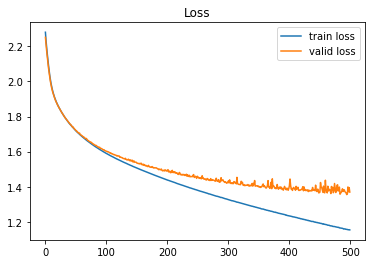

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

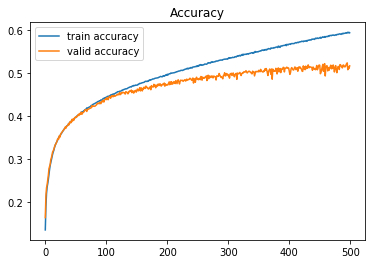

In [10]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()